In [1]:
import logomaker as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

In [3]:
def getCounts(seqs, counts, sl):
    dct_c = {'A':[0 for x in range(sl)], 'T':[0 for x in range(sl)], 'G':[0 for x in range(sl)], 'C':[0 for x in range(sl)]}
    for c, s in zip(counts, seqs):
        if 'N' in s:
            pass
        else:
            for i, char in enumerate(s):
                dct_c[char][i] += c
    df_c = pd.DataFrame(dct_c)
    df_c.index.name='pos'
    return df_c

In [7]:
df = pd.read_csv('/home/kurfurst/Documents/datasets/MV_aurora_reselection.tsv', sep='\t', names=['count', 'seq'])

In [8]:
df.head()

,count,seq
0,25022,GGAAGGGATGAGCAGAGTAGCGCGACGATGACGAATTTTGTAACTA...
1,24379,GGAAGGGATGAGCAAGGCAGCATGATGCTGACGAATCTAATTACTA...
2,13326,GGAAGGGATGAACAGGGCAGCAGGATGCTGCAGATTTTTCTCACTA...
3,8839,GGAAGGGATGCGTAAGTAAGCGGGACGCTGACGCATCTTCTTACTA...
4,8414,GGAAGGGATGGCAAAGGCAGCGGGACGCTGGCGAAATGTCTCACTA...


In [9]:
seqlen = len(df.iloc[0]['seq'])
df_counts = getCounts(df['seq'], df['count'], seqlen)
info_mat = lm.transform_matrix(df_counts, from_type='counts', to_type='information')

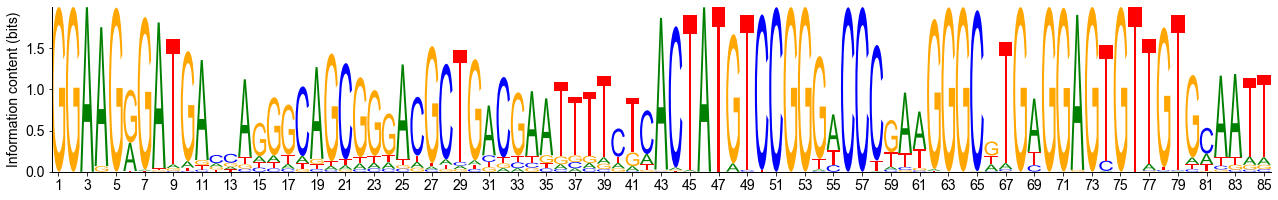

In [10]:
seqlogo = lm.Logo(info_mat, font_name = 'Arial', figsize=(18,3))
seqlogo.style_spines(visible=False)
seqlogo.style_spines(spines=['left', 'bottom'], visible=True)
seqlogo.ax.set_ylabel('Information content (bits)')
seqlogo.ax.set_xticks([x for x in range(0, seqlen, 2)])
seqlogo.ax.set_xticklabels([x for x in range(1, seqlen+1, 2)])
seqlogo.fig.tight_layout()
seqlogo.fig.savefig('fig3a.png', dpi=180)